#**აღდგენითი დავალება #1**
## **ვადა (deadline): 18 ივნისი 18:00**

- თითოეული სავარჯიშო ფასდება შესაბამისი ქულით, რაც ჯამში შეადგენს **7 ქულას**

## **სავარჯიშო 1:** სამედიცინო ტესტის სიზუსტე (**1 ქულა**)

გარკვეული დაავადება გვხვდება მოსახლეობის 0.5%-ში. ამ დაავადების გამოსავლენ სამედიცინო ტესტს აქვს 99% მგრძნობელობა (ჭეშმარიტად დადებითი მაჩვენებელი) და 99% სპეციფიკურობა (ჭეშმარიტად უარყოფითი მაჩვენებელი). თუ ადამიანს ტესტის პასუხი დადებითი აქვს, რა არის იმის ალბათობა, რომ მას ნამდვილად აქვს ეს დაავადება?
- ამოხსენით ბაიესის ფორმულით.
- დაწერეთ შესაბამისი პითონის კოდი.



### **ამოხსნა:**

*აქ დაწერეთ ფორმულით ამოხსნა*

In [9]:
# კოდი
import numpy as np

P_D = 0.005
P_not_D = 1 - P_D
P_T_given_D = 0.99
P_T_given_not_D = 0.01

P_T = (P_T_given_D * P_D) + (P_T_given_not_D * P_not_D)

P_D_given_T = (P_T_given_D * P_D) / P_T

print(f"The probability of having the disease given a positive test result is: {P_D_given_T:.4f} or {P_D_given_T * 100:.2f}%")





The probability of having the disease given a positive test result is: 0.3322 or 33.22%


## **სავარჯიშო 2:** ვებსაიტის კონვერსიის მაჩვენებლების A/B ტესტირება (**1 ქულა**)

კომპანიას სურს შეამოწმოს, ახალი ვებსაიტის დიზაინი საშუალოდ უფრო მაღალ კონვერსიის იძლევა, თუ ამჟამინდელი. ისინი ატარებენ A/B ტესტს, სადაც ახალ დიზაინს აჩვენებენ მომხმარებელთა შემთხვევით შერჩეულ ჯგუფს (ჯგუფი A), ხოლო ამჟამინდელ დიზაინს - სხვა შემთხვევით შერჩეულ ჯგუფს (ჯგუფი B).
- ქვემოთ მოცემული მონაცემებიდან დათვალეთ და შეადარეთ საშუალო კონვერსიები.
- ჩამოაყალიბეთ ჰიპოთეზა და გატესტეთ.


In [2]:
import numpy as np
import scipy.stats as stats

conversions_A = np.array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1])
conversions_B = np.array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

mean_A = np.mean(conversions_A)
mean_B = np.mean(conversions_B)

se_A = np.std(conversions_A, ddof=1) / np.sqrt(len(conversions_A))
se_B = np.std(conversions_B, ddof=1) / np.sqrt(len(conversions_B))

z_score = (mean_A - mean_B) / np.sqrt(se_A**2 + se_B**2)

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"A ჯგუფის საშუალო კონვერსია: {mean_A}")
print(f"B ჯგუფის საშუალო კონვერსია: {mean_B}")
print(f"Z-ქულა: {z_score}")
print(f"P-მნიშვნელობა: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates.")


A ჯგუფის საშუალო კონვერსია: 0.6
B ჯგუფის საშუალო კონვერსია: 0.3
Z-ქულა: 1.3416407864998738
P-მნიშვნელობა: 0.17971249487899987
Fail to reject the null hypothesis: There is no significant difference in conversion rates.


## **სავარჯიშო 3:** გაყიდვების მონაცემების ანალიზი (**1 ქულა**)

საცალო ვაჭრობის კომპანიას სურს გააანალიზოს გაყიდვების მონაცემები (sales_data.csv), რათა გაიგოს ტენდენციები, სეზონური მახასიათებლები და სხვადასხვა პროდუქტის კატეგორიების წარმადობა (performance)
- ხაზოვანი დიაგრამით გამოსახეთ გაყიდვების დროითი მწკრივი.
- სვეტოვანი დიაგრამით გამოსახეთ ყოველთვიური გაყიდვები.
- პროდუქტის კატეგორიების მიხედვით ვიზუალიზება გაუკეთეთ ბოქსპლოტებს.

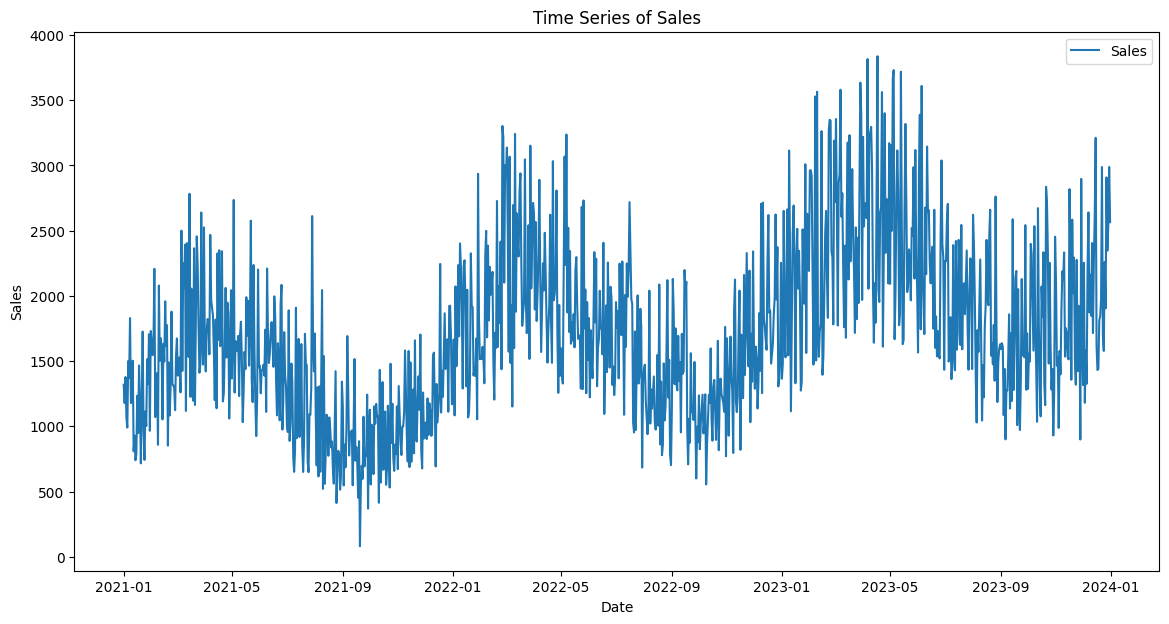

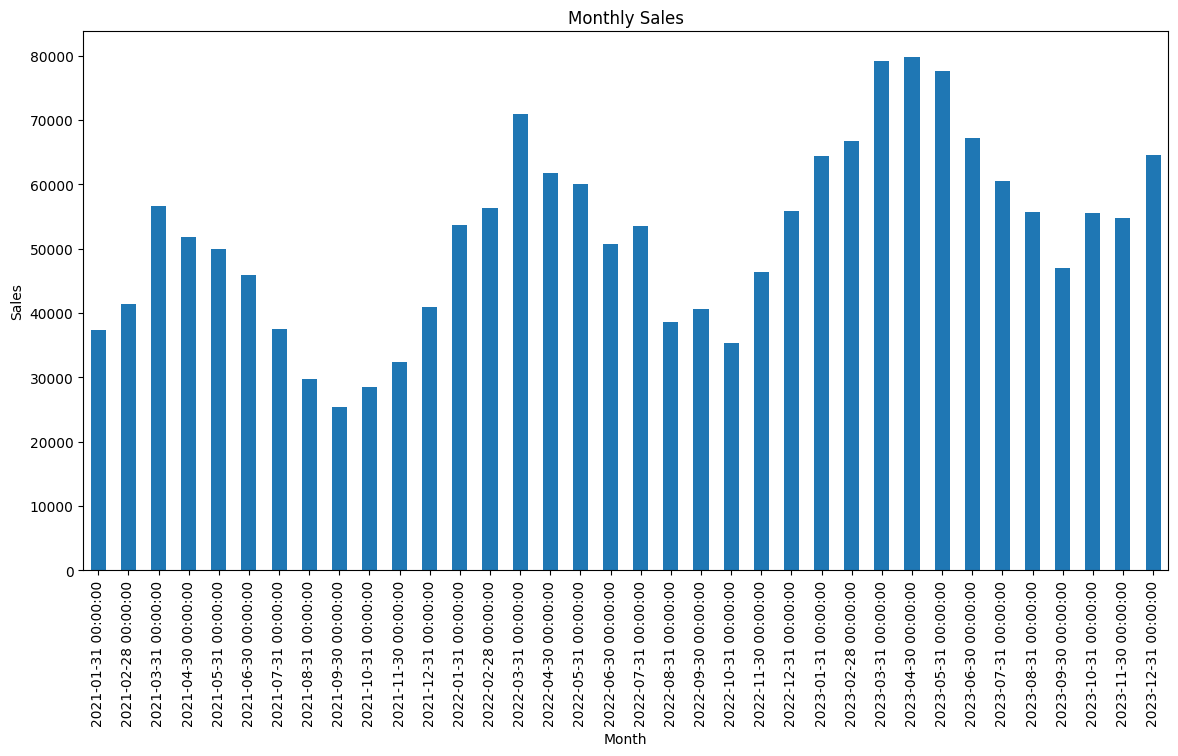

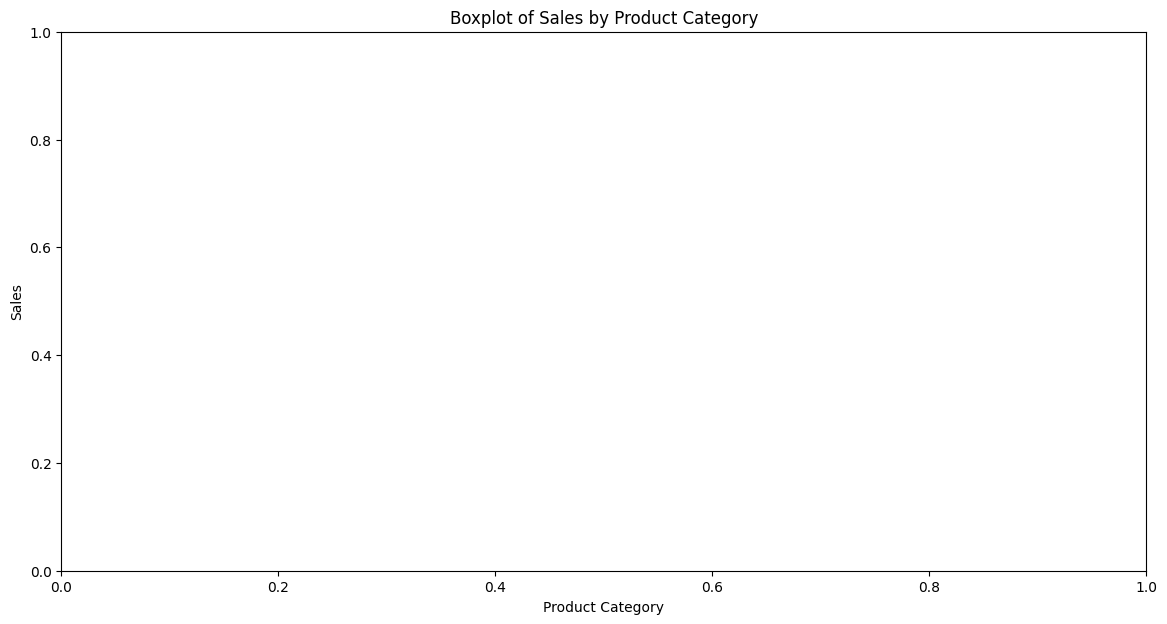

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

sales_data = pd.read_csv('sales_data.csv')

sales_data['date'] = pd.to_datetime(sales_data['date'])

sales_data.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(sales_data['sales'], label='Sales')
plt.title('Time Series of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

monthly_sales = sales_data['sales'].resample('M').sum()

plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(14, 7))
# sales_data.boxplot(column='sales', by='product_category')
plt.title('Boxplot of Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.suptitle('')
plt.show()


## **სავარჯიშო 4:** საგამოცდო ქულების ანალიზი (**1 ქულა**)

უნივერსიტეტს სურს გააანალიზოს სტუდენტების საგამოცდო ქულების განაწილება, რათა გაიგოს მათი მოსწრების პროფილი.
- seaborn ბიბლიოთეკის მეშვეობით გამოსახეთ საგამოცდო ქულების ჰისტოგრამა და განაწილების ფუნქცია.
- pandas და scipy.stats-ის მეშვეობით დათვალეთ განაწილების საშუალო, მედიანა, მოდა, დისპერსია, სტანდარტული გადახრა, ასიმეტრია და ექსცესი. დაბეჭდეთ მიღებული შედეგები.


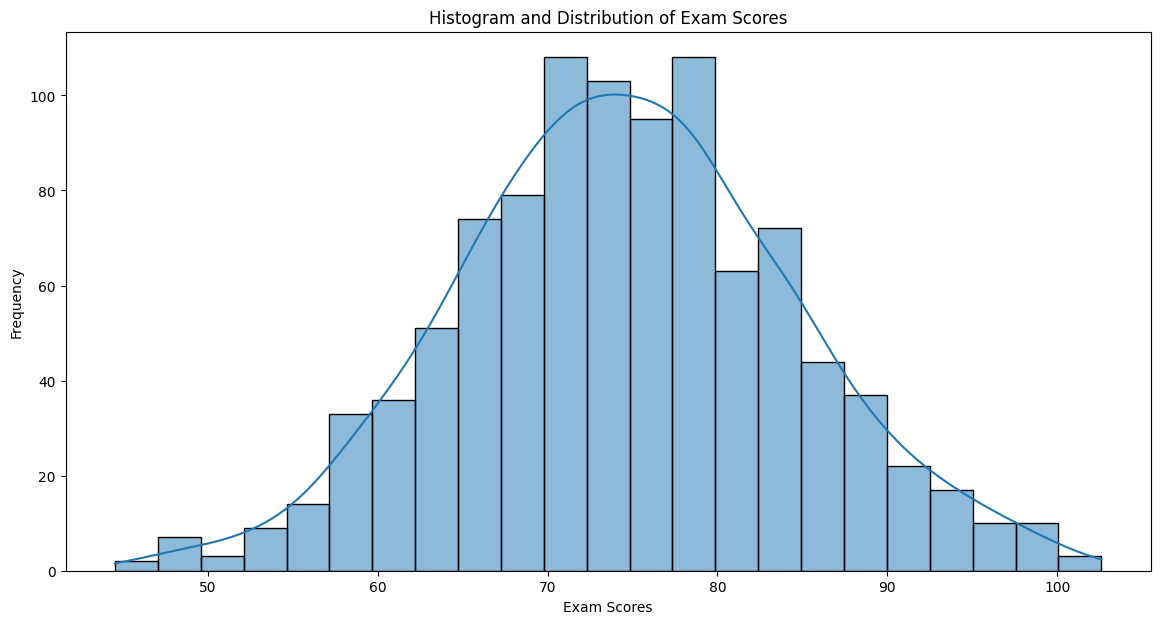

Mean: 74.54743292509804
Median: 74.41971965200372
Variance: 97.52096659781323
Standard Deviation: 9.875270456945128
Skewness: 0.03385895323566018
Kurtosis: -0.04676632447832896


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode

# მონაცემების გენერირება
np.random.seed(0)
exam_scores = np.random.normal(75, 10, 1000)

# ცხრილად ქცევა
df = pd.DataFrame({'Exam Scores': exam_scores})

# ვიზუალიზება - ჰისტოგრამა და განაწილების ფუნქცია
plt.figure(figsize=(14, 7))
sns.histplot(df['Exam Scores'], kde=True)
plt.title('Histogram and Distribution of Exam Scores')
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.show()

# მახასიათებლები
mean = df['Exam Scores'].mean()
median = df['Exam Scores'].median()
# mode_value = mode(df['Exam Scores'])[0][0]
variance = df['Exam Scores'].var()
std_dev = df['Exam Scores'].std()
skewness = skew(df['Exam Scores'])
kurt = kurtosis(df['Exam Scores'])

# დაბეჭდე შედეგები
print(f"Mean: {mean}")
print(f"Median: {median}")
# print(f"Mode: {mode_value}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


## **სავარჯიშო 5:** დასაქმებულთა ხელფასის მოდელი (**3 ქულა**)

კომპანიას სურს შეაფასოს, დასაქმების ბაზარზე ხელფასზე რა გავლენას ახდენს გამოცდილება, განათლების დონე და თანამდებობა, რათა უზრუნველყოს სამართლიანი და კონკურენტული ანაზღაურება. მოცემულია დასაქმების ბაზრის მონაცემები employee_salaries.csv:

- განსაზღვრეთ წრფივი რეგრესიის ფორმულა.
- გაყავით მონაცემები საწვრთნელ და სატესტო ნაწილებად.
- გაწვრთენით წრფივი რეგრესიის მოდელი.
- სვეტოვანი დიაგრამით გამოსახეთ რეგრესიის კოეფიციენტები.
- გაფანტულობის დიაგრამით გამოსახეთ ნამდვილი და მოდელით ნაპროგნოზები ხელფასების ურთიერთმიმართება.
- გამოთვალეთ მოდელის საშუალო კვადრატული ცდომილების ფესვი (RMSE - Root Mean Squared Error), საშუალო აბსოლუტური შეცდომა (MAE - Mean Absolute Error) და $R^2$ (დეტერმინაციის კოეფიციენტი).
- გამოიტანეთ დასკვნა, რამდენად კარგი ჩანს მოდელი.


   experience  education job_position        salary
0    7.123591          0       Junior  12130.807823
1    5.215617          0       Senior  13975.692769
2    4.798317          1       Junior  12589.845042
3    3.799687          0       Junior   9344.863186
4    3.412767          2       Senior  14794.335833


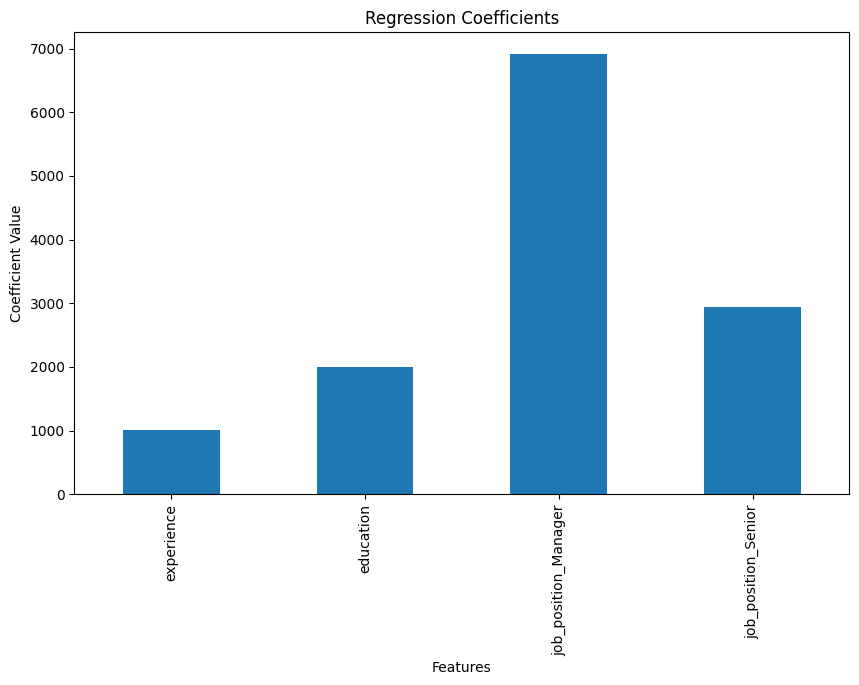

Root Mean Squared Error (RMSE): 1008.522302566311
Mean Absolute Error (MAE): 810.8490362511724
R² (coefficient of determination): 0.9118584938427919


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('employee_salaries.csv')

print(data.head())

data = pd.get_dummies(data, drop_first=True)

X = data.drop(columns=['salary'])
y = data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² (coefficient of determination): {r2}")
